# Summary
This notebook presents a comprehensive analysis of three key datasets: Tesla search trends and stock prices, Bitcoin search trends and prices, and unemployment benefits data. The analysis begins with a thorough exploration of each dataset, assessing data quality and summarizing key statistics. Following this, I now went forth to perform exploratory data analysis to visualize trends and relationships among the variables.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing the various datasets
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# 1. Data Exploration

**1. Tesla**

In [3]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [4]:
print(df_tesla.isna().values.any())
print(df_tesla.duplicated().values.any())

False
False


In [5]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [6]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

**2. Bitcoins**

In [7]:
print(df_btc_search.info())
print('='*50)
print(df_btc_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2204 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.8+ KB
None


In [8]:
print(df_btc_search.isna().values.any())
print('='*50)
print(df_btc_price.isna().values.any())

False
True


Notice that we have missing values in our bitcoins price dataframe

In [9]:
df_btc_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

Given that we have just a one missing in both the close and volume columns, we can go ahead and drop it

In [10]:
df_btc_price.dropna(inplace = True)

In [11]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

**3. Unemployment**

In [12]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [13]:
print(df_unemployment.isna().values.any())
print(df_unemployment.duplicated().any())

False
False


In [14]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [15]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

**Partial Conclusion**

From here, we can safely say that our dataset is clean and as a result, we can now  begin exploratory data analysis. 

# 2. Exploratory Data Analysis

Here, I visualize the trends of the different features in each dataframe

**Tesla Stock Price Vs Search Trend**

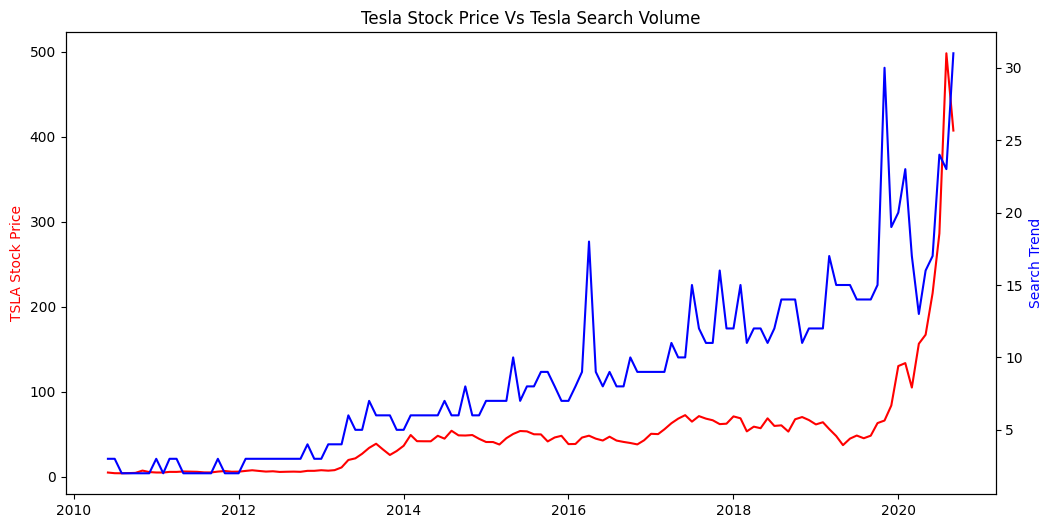

In [16]:
plt.figure(figsize=(12,6))
plt.title('Tesla Stock Price Vs Tesla Search Volume')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color = 'red')
ax2.set_ylabel('Search Trend', color = 'blue')

ax1.plot(df_tesla['MONTH'],df_tesla['TSLA_USD_CLOSE'], color = 'red')
ax2.plot(df_tesla['MONTH'],df_tesla['TSLA_WEB_SEARCH'], color = 'blue')

We observed that, the Tesla's stock price has shown significant growth, particularly from around 2019, where it increases dramatically. Moreso, the correlation between search volume and stock price could be indicative of investor sentiment, whereby there is an increasing public interest which often precedes significant stock price movements.


I now went forth to resample the data column from the bitcoin price dataframe by month and carried the following analysis.

In [17]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()

In [18]:
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


**Bitcoin News Search Vs Resampled Price**

[]

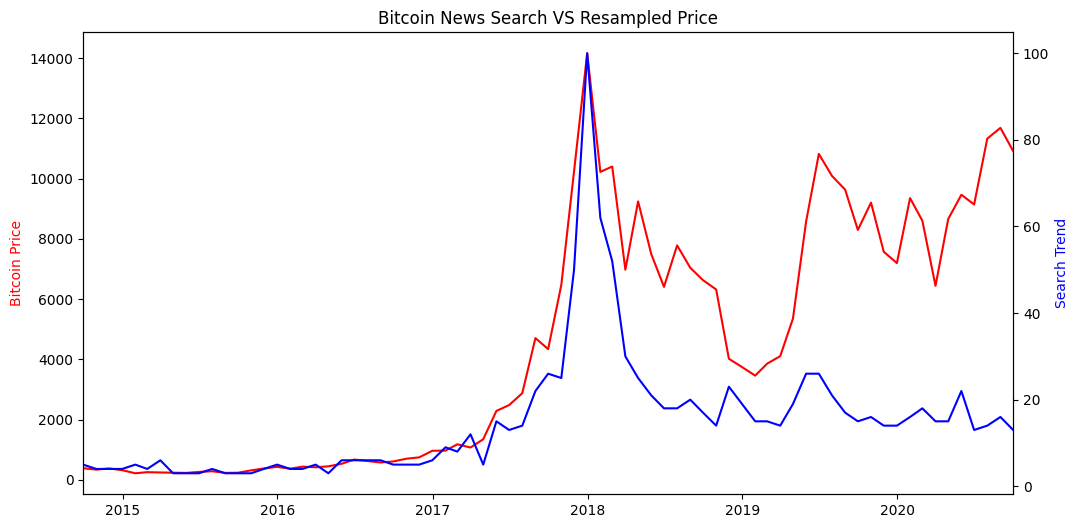

In [19]:
plt.figure(figsize=(12,6))
plt.title('Bitcoin News Search VS Resampled Price')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Bitcoin Price', color = 'red')
ax2.set_ylabel('Search Trend', color = 'blue')

ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])


ax1.plot(df_btc_monthly.index, df_btc_monthly['CLOSE'],color='red')
ax2.plot(df_btc_monthly.index, df_btc_search['BTC_NEWS_SEARCH'],color='blue')

ax1.plot()

Here, we observe a spike around 2018 which correlates with the search trend (volume). This could mean that, heightened public interest could have contributed to the increase in Bitcoin prices.

In [20]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


**Unemployment Benefits Search VS Actual Unemployment**

[]

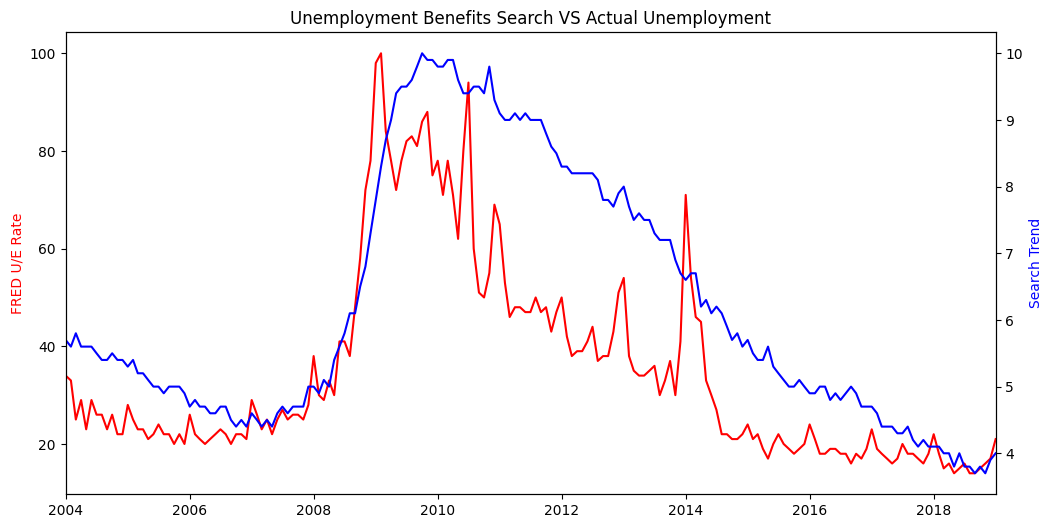

In [21]:
plt.figure(figsize=(12,6))
plt.title('Unemployment Benefits Search VS Actual Unemployment')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color = 'red')
ax2.set_ylabel('Search Trend', color = 'blue')

ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'],color='red')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'],color='blue')

ax1.plot()

From the plot above, we observe that as the unemployment rate increases, the searches for unemployment benefits increases as well. This therefore could mean that, people tend to seek for benefits or assistance during job loss.

I now went forth to look at the 6-month rolling average search data against the actual unemployment so as to have a clearer view of the underlying trends.

[]

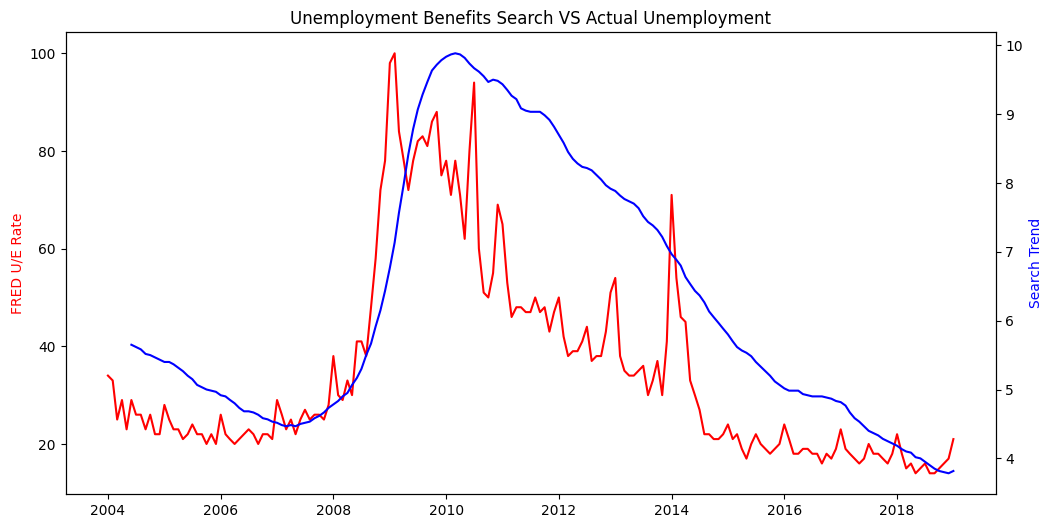

In [22]:
plt.figure(figsize=(12,6))
plt.title('Unemployment Benefits Search VS Actual Unemployment')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color = 'red')
ax2.set_ylabel('Search Trend', color = 'blue')

ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'],color='red')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'].rolling(window = 6).mean(),color='blue')

ax1.plot()

I went forth to visualize the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' as well.

In [23]:
df_eu_20 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

In [24]:
df_eu_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   200 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64  
 2   UNRATE                  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [25]:
df_eu_20['MONTH'] = pd.to_datetime(df_eu_20['MONTH'])

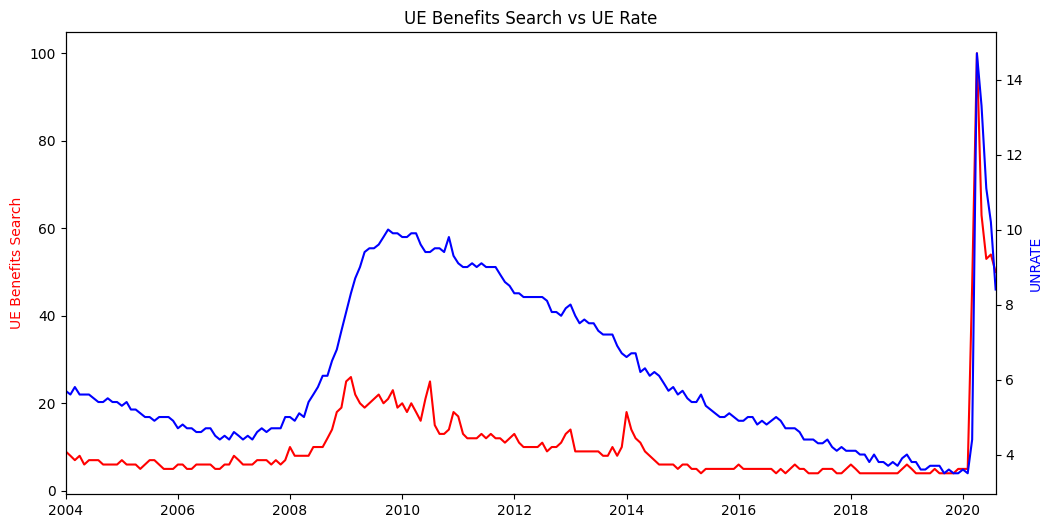

In [26]:
plt.figure(figsize=(12,6))
plt.title('UE Benefits Search vs UE Rate')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('UE Benefits Search', color = 'red')
ax2.set_ylabel('UNRATE', color = 'blue')

ax1.set_xlim([df_eu_20['MONTH'].min(), df_eu_20['MONTH'].max()])

ax1.plot(df_eu_20['MONTH'],df_eu_20['UE_BENEFITS_WEB_SEARCH'], color = 'red')
ax2.plot(df_eu_20['MONTH'],df_eu_20['UNRATE'], color = 'blue')



* We can observe a gradual increase in both the unemployment benefits search volume and unemployment rate between 2004 and 2008 particularly around the onset of the financial crisis in 2008. [Read about the 2008 Financial Crisis Here](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis)
* After the peak in 2009, we also observe a decrease in both the unemployment rate and search volume.
* As both factors stabilize with time, we observe a dramatical increase in the rate of unemployment and search volume in 2020 which was likely due to the COVID-19 pandemic. [Link](https://en.wikipedia.org/wiki/COVID-19_recession#:~:text=The%202020%20stock%20market%20crash%20began%20on%2020%20February%202020,the%20Great%20Depression%20in%201929.)

# Conclusion
In this analysis, we explored the relationships between search trends and market behavior for Tesla and Bitcoin, as well as the dynamics of unemployment benefits.These findings suggest that, search trends can serve as valuable indicators for market sentiment and economic conditions. 

# Future Works
Future research could deepen this analysis by incorporating additional variables or exploring causal relationships.